# Conociendo Pandas &#128060;

## Programación

### Universidad del Quindío / Ph.D. Santiago Echeverri Arteaga

\begin{equation}
    x' = x\cos(\phi) - y\sin(\phi)
\end{equation}

\begin{equation}
    y' = x\sin(\phi) + y\cos(\phi)
\end{equation}

### Importar módulos

In [152]:
import pandas as pd
import numpy as np
import datetime #Para manejo de fechas
import pytz #Para zonas horarias
import json #Para archivos json
from pandas.io.json import json_normalize #Para normalizar archivos json

### Series

In [132]:
sdata = {'Bogota':3500, 'Armenia':1450, 'Ibague':2000, 'Cartagena':0, 'San Andrés':np.nan}
serie1 = pd.Series(sdata)
print("\t\tMostrando la serie")
display(serie1)

		Mostrando la serie


Bogota        3500.0
Armenia       1450.0
Ibague        2000.0
Cartagena        0.0
San Andrés       NaN
dtype: float64

In [6]:
print("\t\tMostrando valores únicos")
display(serie1.unique())
print("\t\tMostrando conteo de valores")
display(serie1.value_counts())

		Mostrando valores únicos


array([3500., 1450., 2000.,    0.,   nan])

		Mostrando conteo de valores


3500.0    1
1450.0    1
2000.0    1
0.0       1
dtype: int64

In [133]:
print("\t\tMostrando datos filtrados")
display(serie1[serie1>0])
print("\t\tMostrando filtro")
display(serie1>0)

		Mostrando datos filtrados


Bogota     3500.0
Armenia    1450.0
Ibague     2000.0
dtype: float64

		Mostrando filtro


Bogota         True
Armenia        True
Ibague         True
Cartagena     False
San Andrés    False
dtype: bool

In [134]:
print("\t\tMostrando nulos")
display(serie1.isnull())
print("\t\tMostrando no nulos")
display(serie1.notnull())

		Mostrando nulos


Bogota        False
Armenia       False
Ibague        False
Cartagena     False
San Andrés     True
dtype: bool

		Mostrando no nulos


Bogota         True
Armenia        True
Ibague         True
Cartagena      True
San Andrés    False
dtype: bool

In [135]:
#sdata2 = {'Bogota':2500, 'Armenia':2000, 'Cartagena':3000, 'San Andrés':15000, 'Amazonas':1500}
sdata2 = [2500,2000,3000,15000,1500]
states = ['Bogota', 'Armenia', 'Cartagena', 'San Andrés', 'Amazonas']
serie2 = pd.Series(sdata2, index=states)
serie1+serie2

Amazonas         NaN
Armenia       3450.0
Bogota        6000.0
Cartagena     3000.0
Ibague           NaN
San Andrés       NaN
dtype: float64

### DataFrames

In [137]:
asignacion = ['Alice', 'Bob', 'Charles', 'Dana', 'Eli', 'Frank']
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data, index=asignacion)
print('\t FRAME')
display(frame)
print('\t COLUMNS')
display(frame.columns)

	 FRAME


,state,year,pop
Alice,Ohio,2000,1.5
Bob,Ohio,2001,1.7
Charles,Ohio,2002,3.6
Dana,Nevada,2001,2.4
Eli,Nevada,2002,2.9
Frank,Nevada,2003,3.2


	 COLUMNS


Index(['state', 'year', 'pop'], dtype='object')

In [138]:
print('\t INDEX')
display(frame.index)
print('\t VALUES')
display(frame.values)

	 INDEX


Index(['Alice', 'Bob', 'Charles', 'Dana', 'Eli', 'Frank'], dtype='object')

	 VALUES


array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

In [12]:
print('\t UNA SOLA COLUMNA CON [ ]')
display(frame['year'])
print('\t UNA SOLA COLUMNA CON [[ ]]')
display(frame[['year']])

	 UNA SOLA COLUMNA CON [ ]


Alice      2000
Bob        2001
Charles    2002
Dana       2001
Eli        2002
Frank      2003
Name: year, dtype: int64

	 UNA SOLA COLUMNA CON [[ ]]


,year
Alice,2000
Bob,2001
Charles,2002
Dana,2001
Eli,2002
Frank,2003


In [13]:
print('\t LOC')
display(frame.loc['Dana'])
print('\t ILOC')
display(frame.iloc[3])

	 LOC


state    Nevada
year       2001
pop         2.4
Name: Dana, dtype: object

	 ILOC


state    Nevada
year       2001
pop         2.4
Name: Dana, dtype: object

In [14]:
df2 = pd.DataFrame({'Nevada':{2001:2.4, 2002:2.9},
              'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}})
df2

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [15]:
print('\t ISIN')
display(df2.isin([2.4,1.5]))
print('\t df2 < 2')
display(df2<2)
print('\t .T')
display(df2.T)
print('\t IDXMIN')
display(df2.idxmin())
print('\t IDXMAX')
display(df2.idxmax())
print('\t ¿ES ÚNICO EL INDEX?')
display(df2.index.is_unique)
print('\t INDEX')
display(df2.index)

	 ISIN


,Nevada,Ohio
2001,True,False
2002,False,False
2000,False,True


	 df2 < 2


,Nevada,Ohio
2001,False,True
2002,False,False
2000,False,True


	 .T


,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


	 IDXMIN


Nevada    2001
Ohio      2000
dtype: int64

	 IDXMAX


Nevada    2002
Ohio      2002
dtype: int64

	 ¿ES ÚNICO EL INDEX?


True

	 INDEX


Int64Index([2001, 2002, 2000], dtype='int64')

In [143]:
df2.rename({2000:0,2001:1,2002:2})

,Nevada,Ohio
1,2.4,1.7
2,2.9,3.6
0,NaN,1.5


In [146]:
ser = pd.Series([1,2,3,4], index=['one','two','three','four'])
display(ser)
print('\n\tREINDEX\n')
display(ser.reindex(['three','four','five','one']))

one      1
two      2
three    3
four     4
dtype: int64


	REINDEX



three    3.0
four     4.0
five     NaN
one      1.0
dtype: float64

### Drop Values

In [148]:
np.arange(16).reshape((4,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [150]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)), index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
display(frame)
display(frame.drop(['blue','yellow']))
display(frame.drop(['pen','pencil'],axis=1))

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


,ball,pen,pencil,paper
red,0,1,2,3
white,12,13,14,15


,ball,paper
red,0,3
blue,4,7
yellow,8,11
white,12,15


In [19]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)),  index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
print('\t\nFRAME')
display(frame)
ser = pd.Series(np.arange(4), index=['ball','pen','pencil','paper'])
print('\t\nSERIE')
display(ser)
print('\t\nRESTA')
display(frame - ser)
ser['mug'] = 9
print('\t\nNUEVA SERIE')
display(ser)
print('\t\nRESTA')
display(frame - ser)

	
FRAME


,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


	
SERIE


ball      0
pen       1
pencil    2
paper     3
dtype: int64

	
RESTA


,ball,pen,pencil,paper
red,0,0,0,0
blue,4,4,4,4
yellow,8,8,8,8
white,12,12,12,12


	
NUEVA SERIE


ball      0
pen       1
pencil    2
paper     3
mug       9
dtype: int64

	
RESTA


,ball,mug,paper,pen,pencil
red,0,NaN,0,0,0
blue,4,NaN,4,4,4
yellow,8,NaN,8,8,8
white,12,NaN,12,12,12


### Operaciones

In [20]:
frame = pd.DataFrame(np.arange(16).reshape((4,4)), index=['red','blue','yellow','white'], columns=['ball','pen','pencil','paper'])
display(frame)
print('\n\tSQRT\n')
display(np.sqrt(frame))
f = lambda x: x.max() - x.min()
print('\n\t¿Qué es esta salida?\n')
display(frame.apply(f))
print('\n\t¿Qué es esta salida?\n')
display(frame.apply(f, axis=1))

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15



	SQRT



,ball,pen,pencil,paper
red,0.000000,1.000000,1.414214,1.732051
blue,2.000000,2.236068,2.449490,2.645751
yellow,2.828427,3.000000,3.162278,3.316625
white,3.464102,3.605551,3.741657,3.872983



	¿Qué es esta salida?



ball      12
pen       12
pencil    12
paper     12
dtype: int64


	¿Qué es esta salida?



red       3
blue      3
yellow    3
white     3
dtype: int64

In [151]:
def f(x):
            return pd.Series([x.min(), x.max(), x.sum(), x.mean(), x.std()], index=['minimo','maximo', 'suma', 'media', 'standard deviation'])
frame.apply(f)

,ball,pen,pencil,paper
minimo,0.000000,1.000000,2.000000,3.000000
maximo,12.000000,13.000000,14.000000,15.000000
suma,24.000000,28.000000,32.000000,36.000000
media,6.000000,7.000000,8.000000,9.000000
standard deviation,5.163978,5.163978,5.163978,5.163978


In [207]:
pd.DataFrame({"Armenia":{"Matemáticas":45,"Español":26, "Filosofía":17, "Física":18,"Medicina":50},
              "Bogotá":{"Matemáticas":70,"Español":48, "Filosofía":50, "Física":48, "Medicina":50}})

,Armenia,Bogotá
Matemáticas,45,70
Español,26,48
Filosofía,17,50
Física,18,48
Medicina,50,50


In [22]:
frame.std()

ball      5.163978
pen       5.163978
pencil    5.163978
paper     5.163978
dtype: float64

In [23]:
frame.describe()

,ball,pen,pencil,paper
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


In [24]:
frame.sort_index(axis=1) #axis=1

,ball,paper,pen,pencil
red,0,3,1,2
blue,4,7,5,6
yellow,8,11,9,10
white,12,15,13,14


In [25]:
frame.sort_values(by='paper', ascending=False)

,ball,pen,pencil,paper
white,12,13,14,15
yellow,8,9,10,11
blue,4,5,6,7
red,0,1,2,3


### Correlación y Covarianza

In [26]:
seq2 = pd.Series([0.3,0.4,0.3,0.4,0.5,0.4,0.3,0.2],['2006','2007','2008','2009','2010','2011','2012','2013'])
seq = pd.Series([0.1,0.2,0.3,0.4,0.4,0.3,0.2,0.1],['2006','2007','2008','2009','2010','2011','2012','2013'])
print("Corr: {}, Cov: {}".format(seq.corr(seq2),seq.cov(seq2))) 

Corr: 0.7745966692414834, Cov: 0.008571428571428572


In [27]:
frame2 = pd.DataFrame(np.random.random((8,8)),index=['2006','2007','2008','2009','2010','2011','2012','2013'],
                     columns=['A','B','C','D','E','F','G','H'])
frame2

,A,B,C,D,E,F,G,H
2006,0.769347,0.141461,0.784709,0.724154,0.865791,0.124418,0.615451,0.912082
2007,0.481331,0.486255,0.398465,0.111414,0.739834,0.198160,0.811475,0.466266
2008,0.993288,0.416091,0.493452,0.081581,0.260975,0.935622,0.707364,0.517903
2009,0.415196,0.172685,0.947484,0.428895,0.126494,0.775542,0.619816,0.848293
2010,0.765891,0.509260,0.673049,0.417980,0.842434,0.884172,0.719542,0.719095
2011,0.214111,0.083620,0.417463,0.617656,0.294999,0.835165,0.671950,0.640210
2012,0.782014,0.544309,0.798615,0.165999,0.960156,0.722389,0.920908,0.261687
2013,0.208007,0.175562,0.328143,0.541872,0.116590,0.810283,0.429737,0.634406


In [28]:
frame2.corr()

,A,B,C,D,E,F,G,H
A,1.000000,0.605994,0.380576,-0.452058,0.524751,-0.041575,0.501389,-0.177521
B,0.605994,1.000000,0.043267,-0.812022,0.584833,0.051503,0.748006,-0.676157
C,0.380576,0.043267,1.000000,0.101794,0.302468,-0.078334,0.250695,0.310055
D,-0.452058,-0.812022,0.101794,1.000000,-0.136308,-0.141522,-0.654759,0.757856
E,0.524751,0.584833,0.302468,-0.136308,1.000000,-0.509853,0.670045,-0.250797
F,-0.041575,0.051503,-0.078334,-0.141522,-0.509853,1.000000,-0.126936,-0.175661
G,0.501389,0.748006,0.250695,-0.654759,0.670045,-0.126936,1.000000,-0.663675
H,-0.177521,-0.676157,0.310055,0.757856,-0.250797,-0.175661,-0.663675,1.000000


In [29]:
frame2.cov()

,A,B,C,D,E,F,G,H
A,0.084451,0.033493,0.025033,-0.031857,0.054699,-0.003812,0.021167,-0.010858
B,0.033493,0.036172,0.001863,-0.037451,0.039897,0.003091,0.020667,-0.027067
C,0.025033,0.001863,0.051233,0.005587,0.024557,-0.005594,0.008243,0.014771
D,-0.031857,-0.037451,0.005587,0.058806,-0.011856,-0.010828,-0.023066,0.038682
E,0.054699,0.039897,0.024557,-0.011856,0.128661,-0.057703,0.034914,-0.018935
F,-0.003812,0.003091,-0.005594,-0.010828,-0.057703,0.099553,-0.005818,-0.011666
G,0.021167,0.020667,0.008243,-0.023066,0.034914,-0.005818,0.021103,-0.020293
H,-0.010858,-0.027067,0.014771,0.038682,-0.018935,-0.011666,-0.020293,0.044302


In [30]:
frame2.corrwith(seq,axis=0)

A    0.114185
B    0.177193
C    0.326568
D   -0.205932
E   -0.197328
F    0.573006
G    0.217802
H    0.139938
dtype: float64

### Quitar nulos

#### ¿Qué hace el concat?

In [32]:
null = pd.DataFrame(np.nan,index=['2014'],columns=['A','B','C','D','E','F','G','H'])
filtered = frame2[frame2>0.5]
data = pd.concat([filtered,null])
data['J']=np.nan
data

,A,B,C,D,E,F,G,H,J
2006,0.769347,NaN,0.784709,0.724154,0.865791,NaN,0.615451,0.912082,NaN
2007,NaN,NaN,NaN,NaN,0.739834,NaN,0.811475,NaN,NaN
2008,0.993288,NaN,NaN,NaN,NaN,0.935622,0.707364,0.517903,NaN
2009,NaN,NaN,0.947484,NaN,NaN,0.775542,0.619816,0.848293,NaN
2010,0.765891,0.509260,0.673049,NaN,0.842434,0.884172,0.719542,0.719095,NaN
2011,NaN,NaN,NaN,0.617656,NaN,0.835165,0.671950,0.640210,NaN
2012,0.782014,0.544309,0.798615,NaN,0.960156,0.722389,0.920908,NaN,NaN
2013,NaN,NaN,NaN,0.541872,NaN,0.810283,NaN,0.634406,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.isnull()

,A,B,C,D,E,F,G,H,J
2006,False,True,False,False,False,True,False,False,True
2007,True,True,True,True,False,True,False,True,True
2008,False,True,True,True,True,False,False,False,True
2009,True,True,False,True,True,False,False,False,True
2010,False,False,False,True,False,False,False,False,True
2011,True,True,True,False,True,False,False,False,True
2012,False,False,False,True,False,False,False,True,True
2013,True,True,True,False,True,False,True,False,True
2014,True,True,True,True,True,True,True,True,True


In [34]:
data.dropna()

,A,B,C,D,E,F,G,H,J


In [35]:
data.dropna(how='all',axis=0)

,A,B,C,D,E,F,G,H,J
2006,0.769347,NaN,0.784709,0.724154,0.865791,NaN,0.615451,0.912082,NaN
2007,NaN,NaN,NaN,NaN,0.739834,NaN,0.811475,NaN,NaN
2008,0.993288,NaN,NaN,NaN,NaN,0.935622,0.707364,0.517903,NaN
2009,NaN,NaN,0.947484,NaN,NaN,0.775542,0.619816,0.848293,NaN
2010,0.765891,0.509260,0.673049,NaN,0.842434,0.884172,0.719542,0.719095,NaN
2011,NaN,NaN,NaN,0.617656,NaN,0.835165,0.671950,0.640210,NaN
2012,0.782014,0.544309,0.798615,NaN,0.960156,0.722389,0.920908,NaN,NaN
2013,NaN,NaN,NaN,0.541872,NaN,0.810283,NaN,0.634406,NaN


In [36]:
data.dropna(thresh=4)

,A,B,C,D,E,F,G,H,J
2006,0.769347,NaN,0.784709,0.724154,0.865791,NaN,0.615451,0.912082,NaN
2008,0.993288,NaN,NaN,NaN,NaN,0.935622,0.707364,0.517903,NaN
2009,NaN,NaN,0.947484,NaN,NaN,0.775542,0.619816,0.848293,NaN
2010,0.765891,0.509260,0.673049,NaN,0.842434,0.884172,0.719542,0.719095,NaN
2011,NaN,NaN,NaN,0.617656,NaN,0.835165,0.671950,0.640210,NaN
2012,0.782014,0.544309,0.798615,NaN,0.960156,0.722389,0.920908,NaN,NaN


In [37]:
data.fillna(data.mean(),inplace=True)#inplace=True

In [38]:
data

,A,B,C,D,E,F,G,H,J
2006,0.769347,0.526784,0.784709,0.724154,0.865791,0.827196,0.615451,0.912082,NaN
2007,0.827635,0.526784,0.800964,0.627894,0.739834,0.827196,0.811475,0.711998,NaN
2008,0.993288,0.526784,0.800964,0.627894,0.852054,0.935622,0.707364,0.517903,NaN
2009,0.827635,0.526784,0.947484,0.627894,0.852054,0.775542,0.619816,0.848293,NaN
2010,0.765891,0.509260,0.673049,0.627894,0.842434,0.884172,0.719542,0.719095,NaN
2011,0.827635,0.526784,0.800964,0.617656,0.852054,0.835165,0.671950,0.640210,NaN
2012,0.782014,0.544309,0.798615,0.627894,0.960156,0.722389,0.920908,0.711998,NaN
2013,0.827635,0.526784,0.800964,0.541872,0.852054,0.810283,0.723787,0.634406,NaN
2014,0.827635,0.526784,0.800964,0.627894,0.852054,0.827196,0.723787,0.711998,NaN


In [39]:
data.fillna({'J':0})

,A,B,C,D,E,F,G,H,J
2006,0.769347,0.526784,0.784709,0.724154,0.865791,0.827196,0.615451,0.912082,0.0
2007,0.827635,0.526784,0.800964,0.627894,0.739834,0.827196,0.811475,0.711998,0.0
2008,0.993288,0.526784,0.800964,0.627894,0.852054,0.935622,0.707364,0.517903,0.0
2009,0.827635,0.526784,0.947484,0.627894,0.852054,0.775542,0.619816,0.848293,0.0
2010,0.765891,0.509260,0.673049,0.627894,0.842434,0.884172,0.719542,0.719095,0.0
2011,0.827635,0.526784,0.800964,0.617656,0.852054,0.835165,0.671950,0.640210,0.0
2012,0.782014,0.544309,0.798615,0.627894,0.960156,0.722389,0.920908,0.711998,0.0
2013,0.827635,0.526784,0.800964,0.541872,0.852054,0.810283,0.723787,0.634406,0.0
2014,0.827635,0.526784,0.800964,0.627894,0.852054,0.827196,0.723787,0.711998,0.0


### Removiendo duplicados

In [40]:
rang = pd.DataFrame([np.arange(8)],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
rang2 = pd.DataFrame([np.arange(10,18)],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
rang3 = pd.DataFrame([[0,3,2,3,4,5,6,4]],index=['2014'],columns=['A','B','C','D','E','F','G','H'])
data_dup = pd.concat([frame2,rang,rang,rang2,rang3])
data_dup

,A,B,C,D,E,F,G,H
2006,0.769347,0.141461,0.784709,0.724154,0.865791,0.124418,0.615451,0.912082
2007,0.481331,0.486255,0.398465,0.111414,0.739834,0.198160,0.811475,0.466266
2008,0.993288,0.416091,0.493452,0.081581,0.260975,0.935622,0.707364,0.517903
2009,0.415196,0.172685,0.947484,0.428895,0.126494,0.775542,0.619816,0.848293
2010,0.765891,0.509260,0.673049,0.417980,0.842434,0.884172,0.719542,0.719095
2011,0.214111,0.083620,0.417463,0.617656,0.294999,0.835165,0.671950,0.640210
2012,0.782014,0.544309,0.798615,0.165999,0.960156,0.722389,0.920908,0.261687
2013,0.208007,0.175562,0.328143,0.541872,0.116590,0.810283,0.429737,0.634406
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000


In [41]:
data_dup.drop_duplicates(['A','B'])

,A,B,C,D,E,F,G,H
2006,0.769347,0.141461,0.784709,0.724154,0.865791,0.124418,0.615451,0.912082
2007,0.481331,0.486255,0.398465,0.111414,0.739834,0.198160,0.811475,0.466266
2008,0.993288,0.416091,0.493452,0.081581,0.260975,0.935622,0.707364,0.517903
2009,0.415196,0.172685,0.947484,0.428895,0.126494,0.775542,0.619816,0.848293
2010,0.765891,0.509260,0.673049,0.417980,0.842434,0.884172,0.719542,0.719095
2011,0.214111,0.083620,0.417463,0.617656,0.294999,0.835165,0.671950,0.640210
2012,0.782014,0.544309,0.798615,0.165999,0.960156,0.722389,0.920908,0.261687
2013,0.208007,0.175562,0.328143,0.541872,0.116590,0.810283,0.429737,0.634406
2014,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000
2014,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000


In [42]:
data_dup.drop_duplicates(['A'],keep='last')

,A,B,C,D,E,F,G,H
2006,0.769347,0.141461,0.784709,0.724154,0.865791,0.124418,0.615451,0.912082
2007,0.481331,0.486255,0.398465,0.111414,0.739834,0.198160,0.811475,0.466266
2008,0.993288,0.416091,0.493452,0.081581,0.260975,0.935622,0.707364,0.517903
2009,0.415196,0.172685,0.947484,0.428895,0.126494,0.775542,0.619816,0.848293
2010,0.765891,0.509260,0.673049,0.417980,0.842434,0.884172,0.719542,0.719095
2011,0.214111,0.083620,0.417463,0.617656,0.294999,0.835165,0.671950,0.640210
2012,0.782014,0.544309,0.798615,0.165999,0.960156,0.722389,0.920908,0.261687
2013,0.208007,0.175562,0.328143,0.541872,0.116590,0.810283,0.429737,0.634406
2014,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000
2014,0.000000,3.000000,2.000000,3.000000,4.000000,5.000000,6.000000,4.000000


### Reemplazando

In [43]:
frame

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15


In [44]:
frame.replace({0:1000,5:1500,11:1100})

,ball,pen,pencil,paper
red,1000,1,2,3
blue,4,1500,6,7
yellow,8,9,10,1100
white,12,13,14,15


In [45]:
frame >10

,ball,pen,pencil,paper
red,False,False,False,False
blue,False,False,False,False
yellow,False,False,False,True
white,True,True,True,True


In [46]:
frame.mask((frame <13) & (frame > 5),np.nan)

,ball,pen,pencil,paper
red,0.0,1.0,2.0,3.0
blue,4.0,5.0,NaN,NaN
yellow,NaN,NaN,NaN,NaN
white,NaN,13.0,14.0,15.0


### Indexación Jerárquica

In [47]:
mser = pd.Series(np.random.rand(8), index=[['white','white','white','blue','blue','red','red',
'red'], ['up','down','right','up','down','up','down','left']])
mser

white  up       0.481924
       down     0.768334
       right    0.039184
blue   up       0.064424
       down     0.111730
red    up       0.495450
       down     0.403979
       left     0.054038
dtype: float64

In [48]:
mser['white']

up       0.481924
down     0.768334
right    0.039184
dtype: float64

In [49]:
mser['white','up']

0.481924013299038

In [50]:
mser[:,'up']

white    0.481924
blue     0.064424
red      0.495450
dtype: float64

In [51]:
mser.unstack()

,down,left,right,up
blue,0.111730,NaN,NaN,0.064424
red,0.403979,0.054038,NaN,0.495450
white,0.768334,NaN,0.039184,0.481924


In [52]:
mframe = pd.DataFrame(np.random.randn(16).reshape(4,4),index=[['white','white','red','red'], ['up','down','up','down']], columns=[['pen','pen','paper','paper'],[1,2,1,2]])
mframe

pen               paper          
                   1         2         1         2
white up   -0.661014  1.687551  1.103645 -0.723735
      down  1.894904 -0.225675 -0.379171 -0.043759
red   up    1.585506 -0.046309  1.040026  1.022407
      down -1.634805 -1.229201 -0.729493 -0.915426

In [53]:
mframe.columns.names = ['objects','id']
mframe.index.names = ['colors','status']
mframe

objects             pen               paper          
id                    1         2         1         2
colors status                                        
white  up     -0.661014  1.687551  1.103645 -0.723735
       down    1.894904 -0.225675 -0.379171 -0.043759
red    up      1.585506 -0.046309  1.040026  1.022407
       down   -1.634805 -1.229201 -0.729493 -0.915426

In [54]:
mframe.swaplevel('colors','status')

objects             pen               paper          
id                    1         2         1         2
status colors                                        
up     white  -0.661014  1.687551  1.103645 -0.723735
down   white   1.894904 -0.225675 -0.379171 -0.043759
up     red     1.585506 -0.046309  1.040026  1.022407
down   red    -1.634805 -1.229201 -0.729493 -0.915426

In [55]:
mframe.sort_index(level='colors',inplace=True)
mframe

objects             pen               paper          
id                    1         2         1         2
colors status                                        
red    down   -1.634805 -1.229201 -0.729493 -0.915426
       up      1.585506 -0.046309  1.040026  1.022407
white  down    1.894904 -0.225675 -0.379171 -0.043759
       up     -0.661014  1.687551  1.103645 -0.723735

In [56]:
mframe.sum(level='colors')  

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/1493203325.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  mframe.sum(level='colors')


objects       pen               paper          
id              1         2         1         2
colors                                         
red     -0.049299 -1.275510  0.310533  0.106981
white    1.233889  1.461876  0.724474 -0.767495

In [57]:
mframe.sum(level='id', axis=1)

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/1148412209.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  mframe.sum(level='id', axis=1)


id                    1         2
colors status                    
red    down   -2.364298 -2.144627
       up      2.625531  0.976098
white  down    1.515733 -0.269435
       up      0.442630  0.963816

In [59]:
frame1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],
                        'color': ['white','red','red','black','green'],
                        'brand': ['OMG','ABC','ABC','POD','POD']})
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],
                        'brand': ['OMG','ABC',np.nan,'POD']})
out = pd.merge(frame1,frame2,on=['id','brand'],how='outer')
left = pd.merge(frame1,frame2,on=['id','brand'],how='left')
right= pd.merge(frame1,frame2,on=['id','brand'],how='right')
print("FRAME 1")
display(frame1)
print("FRAME 2")
display(frame2)
print("OUT (Todas)")
display(out)
print("LEFT")
display(left)
print("RIGHT")
display(right)
frame2.columns = ['brand2','id2']
print("JOIN")
print(frame1.join(frame2))

FRAME 1


,id,color,brand
0,ball,white,OMG
1,pencil,red,ABC
2,pen,red,ABC
3,mug,black,POD
4,ashtray,green,POD


FRAME 2


,id,brand
0,pencil,OMG
1,pencil,ABC
2,ball,NaN
3,pen,POD


OUT (Todas)


,id,color,brand
0,ball,white,OMG
1,pencil,red,ABC
2,pen,red,ABC
3,mug,black,POD
4,ashtray,green,POD
5,pencil,NaN,OMG
6,ball,NaN,NaN
7,pen,NaN,POD


LEFT


,id,color,brand
0,ball,white,OMG
1,pencil,red,ABC
2,pen,red,ABC
3,mug,black,POD
4,ashtray,green,POD


RIGHT


,id,color,brand
0,pencil,NaN,OMG
1,pencil,red,ABC
2,ball,NaN,NaN
3,pen,NaN,POD


JOIN
        id  color brand  brand2  id2
0     ball  white   OMG  pencil  OMG
1   pencil    red   ABC  pencil  ABC
2      pen    red   ABC    ball  NaN
3      mug  black   POD     pen  POD
4  ashtray  green   POD     NaN  NaN


In [60]:
frame1 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[1,2,3],
columns=['A','B','C'])
frame2 = pd.DataFrame(np.random.rand(9).reshape(3,3), index=[4,5,6],
columns=['A','B','C'])
print("FRAME 1")
display(frame1)
print("FRAME 2")
display(frame2)
print("CONCAT")
display(pd.concat([frame1, frame2]))

FRAME 1


,A,B,C
1,0.093554,0.560788,0.139528
2,0.877486,0.392468,0.699404
3,0.544861,0.905430,0.649009


FRAME 2


,A,B,C
4,0.801583,0.295725,0.220421
5,0.869147,0.685576,0.564311
6,0.814722,0.258053,0.387467


CONCAT


,A,B,C
1,0.093554,0.560788,0.139528
2,0.877486,0.392468,0.699404
3,0.544861,0.905430,0.649009
4,0.801583,0.295725,0.220421
5,0.869147,0.685576,0.564311
6,0.814722,0.258053,0.387467


In [61]:
frame1 = pd.DataFrame(np.arange(9).reshape(3,3), index=['white','black','red'],
                      columns=['ball','pen','pencil'])
print("FRAME 1")
display(frame1)
ser5 = frame1.stack()
print("STACK")
display(ser5)
ser5.unstack()
print("UNSTACK")
display(ser5.unstack())

FRAME 1


,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


STACK


white  ball      0
       pen       1
       pencil    2
black  ball      3
       pen       4
       pencil    5
red    ball      6
       pen       7
       pencil    8
dtype: int64

UNSTACK


,ball,pen,pencil
white,0,1,2
black,3,4,5
red,6,7,8


In [22]:
longframe = pd.DataFrame({ 'color':['white','white','white','red','red','red',
                                    'black','black','black'],
                          'item':['ball','pen','mug','ball','pen','mug','ball',
                                  'pen','mug'], 'value': np.random.rand(9)})
print("longframe")
display(longframe)
print("WIDE")
display(longframe.pivot('color','item'))

longframe


,color,item,value
0,white,ball,0.540590
1,white,pen,0.047129
2,white,mug,0.787824
3,red,ball,0.957644
4,red,pen,0.540190
5,red,mug,0.549897
6,black,ball,0.269922
7,black,pen,0.556397
8,black,mug,0.099079


WIDE


value                    
item       ball       mug       pen
color                              
black  0.269922  0.099079  0.556397
red    0.957644  0.549897  0.540190
white  0.540590  0.787824  0.047129

In [175]:
frame = pd.DataFrame({ 'item':['rosso','mug','pen','pencil','ashtray'],
                      'color':['white','rosso','verde','black','yellow'],
                      'price':[5.56,4.20,1.30,0.56,2.75]})
frame

,item,color,price
0,rosso,white,5.56
1,mug,rosso,4.20
2,pen,verde,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [176]:
newcolors = {'rosso': 'red', 'verde': 'green'}
frame.color=frame.color.replace(newcolors)
print("replace columna")
display(frame)

frame=frame.replace(newcolors)
print("replace")
display(frame)


reindex = {0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'}
frame.rename(reindex,inplace=True)
print("rename")
display(frame)


recolumn = {'item':'object','price': 'value'}
frame.rename(index=reindex, columns=recolumn, inplace=True)
print("rename column")
display(frame)

replace columna


,item,color,price
0,rosso,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


replace


,item,color,price
0,red,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


rename


,item,color,price
first,red,white,5.56
second,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


rename column


,object,color,value
first,red,white,5.56
second,mug,red,4.20
third,pen,green,1.30
fourth,pencil,black,0.56
fifth,ashtray,yellow,2.75


### Binning (Opcional)

In [63]:
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]
bins = [0,25,50,75,100]
cat = pd.cut(results, bins)
cat2 = pd.cut(results, bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])
cat2

['Q1', 'Q2', 'Q3', 'Q3', 'Q2', ..., 'Q4', 'Q1', 'Q2', 'Q4', 'Q4']
Length: 17
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [64]:
cat[0]

Interval(0, 25, closed='right')

In [65]:
cat.categories

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100]], dtype='interval[int64, right]')

In [66]:
cat.codes

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

In [67]:
pd.value_counts(cat)

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
dtype: int64

In [68]:
frame2

,A,B,C
4,0.801583,0.295725,0.220421
5,0.869147,0.685576,0.564311
6,0.814722,0.258053,0.387467


### Filtrado

In [186]:
randframe = pd.DataFrame(np.random.randn(1000,3))
randframe

,0,1,2
0,-1.306105,-1.631279,-1.816070
1,-2.122736,-0.906481,0.780235
2,3.176070,0.726634,0.547055
3,-1.449218,1.119212,-0.726451
4,-0.408467,1.067117,0.058935
...,...,...,...
995,0.359991,0.124357,-1.138100
996,0.511473,-0.304753,-0.707382
997,1.062768,-1.151885,0.648950
998,0.153921,0.717016,-0.031839


In [183]:
randframe = pd.DataFrame(np.random.randn(1000,3))
randframe[(np.abs(randframe) > (3*randframe.std())).any(1)]

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/3962663039.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  randframe[(np.abs(randframe) > (3*randframe.std())).any(1)]


,0,1,2
143,-0.505767,-3.162473,-0.355414
213,3.335110,-0.983951,-0.285484
748,3.300610,1.991365,0.716420
837,1.311634,3.350317,-0.727845
970,-0.142192,-3.246068,0.187304


#### Random sampling (Opcional)

In [71]:
len(nframe)

5

In [73]:
sample = np.random.randint(0,len(nframe),size=3)
sample

array([2, 1, 2])

In [74]:
nframe.take(sample)

,0,1,2,3,4
2,10,11,12,13,14
1,5,6,7,8,9
2,10,11,12,13,14


### Groupby (Opcional)

In [75]:
frame = pd.DataFrame({ 'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'], 'price1' : [5.56,4.20,1.30,0.56,2.75], 'price2' : [4.75,4.12,1.60,0.75,3.15]})
frame

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [76]:
group = frame['price1'].groupby(frame['color'])
group.mean().to_frame()

,price1
color,
green,2.025
red,2.380
white,5.560


In [77]:
group2 = frame['price1'].groupby([frame['color'],frame['object']])
group2.mean().to_frame()

price1
color object         
green pen        2.75
      pencil     1.30
red   ashtray    0.56
      pencil     4.20
white pen        5.56

In [78]:
frame[['price1','price2']].groupby(frame['color']).mean().add_prefix('mean_') 

,mean_price1,mean_price2
color,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750


In [79]:
temp = pd.date_range('1/1/2015', periods=10, freq= 'H')
temp

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

### Datetime

In [80]:
datetime.datetime.strptime("2000/01/1", "%Y/%m/%d")

datetime.datetime(2000, 1, 1, 0, 0)

In [81]:
datetime.datetime(2000,1,1,0,0).strftime("%Y de  - %d para el mes %m")

'2000 de  - 01 para el mes 01'

In [82]:
pd.to_datetime("2015 4th of July")

Timestamp('2015-07-04 00:00:00')

In [83]:
pd.to_datetime("13.01.2000")

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/1908145606.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime("13.01.2000")


Timestamp('2000-01-13 00:00:00')

In [84]:
pd.to_datetime("7/8/2021", dayfirst=True)

Timestamp('2021-08-07 00:00:00')

In [85]:
temp = pd.date_range('1/1/2015', periods=15, freq= 'BMS')
temp

DatetimeIndex(['2015-01-01', '2015-02-02', '2015-03-02', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-03',
               '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', freq='BMS')

In [86]:
cbh = pd.offsets.CustomBusinessHour(start='06:00', end='16:00', weekmask='Mon Tue Wed Thu Fri Sat')
day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)
index = pd.date_range(start='2000-01-01',periods=20,freq='B')
index

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/4251557687.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-17', '2000-01-18',
               '2000-01-19', '2000-01-20', '2000-01-21', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28'],
              dtype='datetime64[ns]', freq='B')

In [87]:
pd.datetime.now()

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/627754903.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now()


datetime.datetime(2023, 10, 2, 15, 45, 11, 571748)

In [88]:
day_range

DatetimeIndex(['2016-09-13 06:00:00', '2016-09-13 07:00:00',
               '2016-09-13 08:00:00', '2016-09-13 09:00:00',
               '2016-09-13 10:00:00', '2016-09-13 11:00:00',
               '2016-09-13 12:00:00', '2016-09-13 13:00:00',
               '2016-09-13 14:00:00', '2016-09-13 15:00:00',
               ...
               '2023-10-02 06:00:00', '2023-10-02 07:00:00',
               '2023-10-02 08:00:00', '2023-10-02 09:00:00',
               '2023-10-02 10:00:00', '2023-10-02 11:00:00',
               '2023-10-02 12:00:00', '2023-10-02 13:00:00',
               '2023-10-02 14:00:00', '2023-10-02 15:00:00'],
              dtype='datetime64[ns]', length=22080, freq='CBH')

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/401369069.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)


<Axes: >

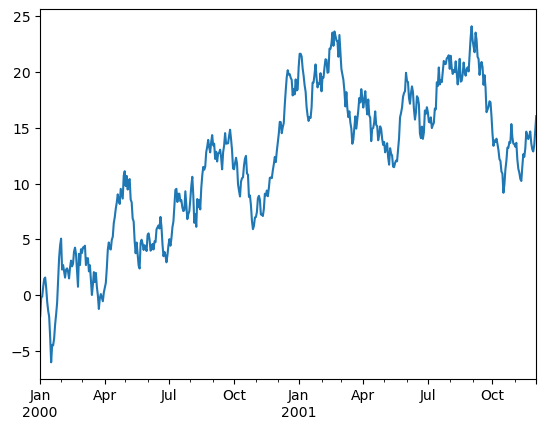

In [89]:
cbh = pd.offsets.CustomBusinessHour(start='06:00', end='16:00', weekmask='Mon Tue Wed Thu Fri Sat')
day_range = pd.date_range(pd.datetime(2016,9,12,18),pd.datetime.now(),freq=cbh)
index = pd.date_range(start='2000-01-01',periods=500,freq='B')
ts = pd.Series(np.random.randn(len(index)),index=index)
walk = ts.cumsum()
walk.plot()

In [90]:
ts['2000-01-03':'2000-01-06']

2000-01-03   -1.861962
2000-01-04    1.650040
2000-01-05    0.090001
2000-01-06    0.881006
Freq: B, dtype: float64

#### Downsampling

In [91]:
rng = pd.date_range('4/29/2015 8:00', periods=600, freq='T')
ts = pd.Series(np.random.randint(0,100, len(rng)), index=rng)
ts.head()

2015-04-29 08:00:00    40
2015-04-29 08:01:00    37
2015-04-29 08:02:00    21
2015-04-29 08:03:00     2
2015-04-29 08:04:00    81
Freq: T, dtype: int64

In [92]:
ts.resample('10min').sum()

2015-04-29 08:00:00    347
2015-04-29 08:10:00    417
2015-04-29 08:20:00    501
2015-04-29 08:30:00    520
2015-04-29 08:40:00    367
2015-04-29 08:50:00    326
2015-04-29 09:00:00    519
2015-04-29 09:10:00    721
2015-04-29 09:20:00    434
2015-04-29 09:30:00    382
2015-04-29 09:40:00    571
2015-04-29 09:50:00    442
2015-04-29 10:00:00    527
2015-04-29 10:10:00    564
2015-04-29 10:20:00    393
2015-04-29 10:30:00    455
2015-04-29 10:40:00    572
2015-04-29 10:50:00    435
2015-04-29 11:00:00    614
2015-04-29 11:10:00    532
2015-04-29 11:20:00    502
2015-04-29 11:30:00    480
2015-04-29 11:40:00    597
2015-04-29 11:50:00    590
2015-04-29 12:00:00    491
2015-04-29 12:10:00    567
2015-04-29 12:20:00    614
2015-04-29 12:30:00    467
2015-04-29 12:40:00    630
2015-04-29 12:50:00    594
2015-04-29 13:00:00    214
2015-04-29 13:10:00    397
2015-04-29 13:20:00    239
2015-04-29 13:30:00    566
2015-04-29 13:40:00    571
2015-04-29 13:50:00    419
2015-04-29 14:00:00    602
2

#### Upsampling

In [93]:
rng = pd.date_range('4/29/2015 8:00', periods=10, freq='H')
ts = pd.Series(np.random.randint(0,100, len(rng)), index=rng)

In [94]:
ts.resample('15min').first().head(10)

2015-04-29 08:00:00    17.0
2015-04-29 08:15:00     NaN
2015-04-29 08:30:00     NaN
2015-04-29 08:45:00     NaN
2015-04-29 09:00:00    70.0
2015-04-29 09:15:00     NaN
2015-04-29 09:30:00     NaN
2015-04-29 09:45:00     NaN
2015-04-29 10:00:00    98.0
2015-04-29 10:15:00     NaN
Freq: 15T, dtype: float64

In [95]:
ts.resample('15min').interpolate().head(10)

2015-04-29 08:00:00    17.00
2015-04-29 08:15:00    30.25
2015-04-29 08:30:00    43.50
2015-04-29 08:45:00    56.75
2015-04-29 09:00:00    70.00
2015-04-29 09:15:00    77.00
2015-04-29 09:30:00    84.00
2015-04-29 09:45:00    91.00
2015-04-29 10:00:00    98.00
2015-04-29 10:15:00    76.75
Freq: 15T, dtype: float64

In [96]:
ts.resample('15min').bfill().head(10)

2015-04-29 08:00:00    17
2015-04-29 08:15:00    70
2015-04-29 08:30:00    70
2015-04-29 08:45:00    70
2015-04-29 09:00:00    70
2015-04-29 09:15:00    98
2015-04-29 09:30:00    98
2015-04-29 09:45:00    98
2015-04-29 10:00:00    98
2015-04-29 10:15:00    13
Freq: 15T, dtype: int64

In [97]:
ts.resample('15min').ffill(limit=2).head(10)

2015-04-29 08:00:00    17.0
2015-04-29 08:15:00    17.0
2015-04-29 08:30:00    17.0
2015-04-29 08:45:00     NaN
2015-04-29 09:00:00    70.0
2015-04-29 09:15:00    70.0
2015-04-29 09:30:00    70.0
2015-04-29 09:45:00     NaN
2015-04-29 10:00:00    98.0
2015-04-29 10:15:00    98.0
Freq: 15T, dtype: float64

#### Zona horaria y time deltas

In [99]:
tz1 = pytz.timezone('Europe/London')
tz2 = pytz.timezone('America/Bogota')
time = pd.date_range('1/1/2021 00:00', periods=10, tz=tz1)
time2 = time.tz_convert(tz2)

In [100]:
time

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-02 00:00:00+00:00',
               '2021-01-03 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-05 00:00:00+00:00', '2021-01-06 00:00:00+00:00',
               '2021-01-07 00:00:00+00:00', '2021-01-08 00:00:00+00:00',
               '2021-01-09 00:00:00+00:00', '2021-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

In [101]:
time2

DatetimeIndex(['2020-12-31 19:00:00-05:00', '2021-01-01 19:00:00-05:00',
               '2021-01-02 19:00:00-05:00', '2021-01-03 19:00:00-05:00',
               '2021-01-04 19:00:00-05:00', '2021-01-05 19:00:00-05:00',
               '2021-01-06 19:00:00-05:00', '2021-01-07 19:00:00-05:00',
               '2021-01-08 19:00:00-05:00', '2021-01-09 19:00:00-05:00'],
              dtype='datetime64[ns, America/Bogota]', freq='D')

In [102]:
time[2]-time2[1]+time2[3]

Timestamp('2021-01-04 19:00:00-0500', tz='America/Bogota', freq='D')

In [103]:
td = pd.Timedelta('1day 2 hour 4min 8s 34us')
time2[0]+td

Timestamp('2021-01-01 21:04:08.000034-0500', tz='America/Bogota', freq='D')

In [104]:
pd.to_timedelta(np.arange(7), unit='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00'],
               dtype='timedelta64[ns]', freq=None)

### Importando y manipulando DataFrames

#### CSV

In [105]:
covid = pd.read_csv('COVID19.csv')
covid.head()

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/1708967008.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv('COVID19.csv')


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [187]:
len(covid)

5003977

In [206]:
covid.info(null_counts=True)

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/2606739618.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  covid.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003977 entries, 0 to 5003976
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             5003977 non-null  object 
 1   ID de caso                    5003977 non-null  int64  
 2   Fecha de notificación         5003977 non-null  object 
 3   Código DIVIPOLA departamento  5003977 non-null  int64  
 4   Nombre departamento           5003977 non-null  object 
 5   Código DIVIPOLA municipio     5003977 non-null  int64  
 6   Nombre municipio              5003977 non-null  object 
 7   Edad                          5003977 non-null  int64  
 8   Unidad de medida de edad      5003977 non-null  int64  
 9   Sexo                          5003977 non-null  object 
 10  Tipo de contagio              5003977 non-null  object 
 11  Ubicación del caso            4984005 non-null  object 
 12  Estado                      

In [205]:
covid[covid.columns[covid.dtypes!=object]].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003977 entries, 0 to 5003976
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID de caso                    5003977 non-null  int64  
 1   Código DIVIPOLA departamento  5003977 non-null  int64  
 2   Código DIVIPOLA municipio     5003977 non-null  int64  
 3   Edad                          5003977 non-null  int64  
 4   Unidad de medida de edad      5003977 non-null  int64  
 5   Código ISO del país           3140 non-null     float64
 6   Pertenencia étnica            4997444 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 267.2 MB


/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/1938621653.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  covid[covid.columns[covid.dtypes!=object]].info(null_counts=True)


In [121]:
covid[covid.columns[(covid.dtypes==object)]]['Sexo'].value_counts()

F    2626882
M    2377084
m          6
f          5
Name: Sexo, dtype: int64

In [122]:
covid[covid.columns[(covid.dtypes==np.float64)]]

,Código ISO del país,Pertenencia étnica
0,380.0,6.0
1,724.0,5.0
2,724.0,6.0
3,NaN,6.0
4,NaN,6.0
...,...,...
5003972,NaN,NaN
5003973,NaN,NaN
5003974,NaN,NaN
5003975,NaN,NaN


Requiere un archivo Json2.json guardado en el mismo directorio que contenga: 

[{"writer": "Mark Ross",
"nationality": "USA",
"books": [
{"title": "XML Cookbook", "price": 23.56},
{"title": "Python Fundamentals", "price": 50.70},
{"title": "The NumPy library", "price": 12.30}
]
},{"writer": "Barbara Bracket",
"nationality": "UK",
"books": [
{"title": "Java Enterprise", "price": 28.60},
{"title": "HTML5", "price": 31.35},
{"title": "Python for Dummies", "price": 28.00}
]
}]

#### json

In [123]:
file = open('Json2.json','r')
text = file.read()
text = json.loads(text)
text

[{'writer': 'Mark Ross',
  'nationality': 'USA',
  'books': [{'title': 'XML Cookbook', 'price': 23.56},
   {'title': 'Python Fundamentals', 'price': 50.7},
   {'title': 'The NumPy library', 'price': 12.3}]},
 {'writer': 'Barbara Bracket',
  'nationality': 'UK',
  'books': [{'title': 'Java Enterprise', 'price': 28.6},
   {'title': 'HTML5', 'price': 31.35},
   {'title': 'Python for Dummies', 'price': 28.0}]}]

In [125]:
json_normalize(text,'books',['nationality','writer'])

/var/folders/pb/ldktvl7n1cjb78yx2vbmbmdr0000gn/T/ipykernel_24607/3284362935.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(text,'books',['nationality','writer'])


,title,price,nationality,writer
0,XML Cookbook,23.56,USA,Mark Ross
1,Python Fundamentals,50.70,USA,Mark Ross
2,The NumPy library,12.30,USA,Mark Ross
3,Java Enterprise,28.60,UK,Barbara Bracket
4,HTML5,31.35,UK,Barbara Bracket
5,Python for Dummies,28.00,UK,Barbara Bracket


Requiere un archivo Json2.json guardado en el mismo directorio que contenga: {"up":{"white":0,"black":4,"red":8,"blue":12},"down":{"white":1,"black":5,
"red":9,"blue":13},"right":{"white":2,"black":6,"red":10,"blue":14},
"left":{"white":3,"black":7,"red":11,"blue":15}}

In [128]:
pd.read_json('Json1.json')

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15
